### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Стелина Петрити
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант № 9
1. Abalone Data Set
2. Название файла: abalone.data
3. Ссылка: http://archive.ics.uci.edu/ml/datasets/Abalone
4. Первый признак: Length (столбец No 2)
5. Второй признак: Diameter (столбец No 3)
6. Класс: Sex (столбец No 1)
7. Алгоритмы: K-means, Agglomerative Clustering, DBSCAN, Gaussian Mixture Model
8. Меры качества: условная энтропия, парные меры TP, FN, FP, TN, индекс Rand
9. Найти лучший алгоритм кластеризации относительно меры качества: условная энтропи





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.	Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса.

In [ ]:
import pandas as pd

# Задаем путь к файлу
path = '/content/drive/MyDrive/viti 4/Semestri 1/moduli 1/Data mining/Lab 7/abalone.data'

# Загружаем данные
data = pd.read_csv(path, header=None)

# Выбираем нужные столбцы
features = data[[0, 1, 2]]  # Столбцы 1 (Sex), 2 (Length) и 3 (Diameter)
features.columns = ['Sex', 'Length', 'Diameter']  # Переименовываем столбцы для удобства

# Извлекаем признаки и метку класса
X = features[['Length', 'Diameter']]  # Признаки
y = features['Sex']  # Метка класса

# Выводим первые несколько строк, чтобы убедиться, что данные загружены корректно
print(X.head())
print(y.head())


   Length  Diameter
0   0.455     0.365
1   0.350     0.265
2   0.530     0.420
3   0.440     0.365
4   0.330     0.255
0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object


###2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.


In [ ]:
# Удаляем записи с пропущенными метками класса
features = features.dropna(subset=['Sex'])

# Преобразуем метки класса в категориальные (если это не было сделано ранее)
features['Sex'] = features['Sex'].astype('category')

# Находим медианные значения признаков для каждого класса
medians = features.groupby('Sex', observed=False).median()

# Заполняем пропущенные значения в признаках медианными значениями соответствующего класса
def missing_values(row):
    if pd.isna(row['Length']) or pd.isna(row['Diameter']):
        class_label = row['Sex']
        if pd.isna(row['Length']):
            row['Length'] = medians.loc[class_label, 'Length']
        if pd.isna(row['Diameter']):
            row['Diameter'] = medians.loc[class_label, 'Diameter']
    return row

# Применяем функцию к каждой строке
features = features.apply(missing_values, axis=1)

# Проверяем, есть ли ещё пропущенные значения
print(features.isna().sum())

# Выделяем признаки и метки класса
X = features[['Length', 'Diameter']]  # Признаки
y = features['Sex']  # Метка класса

# Выводим первые несколько строк, чтобы убедиться, что данные обработаны корректно
print(X.head())
print(y.head())


Sex         0
Length      0
Diameter    0
dtype: int64
   Length  Diameter
0   0.455     0.365
1   0.350     0.265
2   0.530     0.420
3   0.440     0.365
4   0.330     0.255
0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object


###3. Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало пять.

In [ ]:
# Проверяем количество уникальных классов
special_classes = features['Sex'].value_counts()
print("Количество уникальных меток класса до объединения:")
print(special_classes)

# Если количество уникальных меток класса больше пяти, объединяем наименее многочисленные
if len(special_classes) > 5:
    classes_combine = special_classes.index[-(len(special_classes) - 5):]
    features['Sex'] = features['Sex'].apply(lambda x: 'Other' if x in classes_combine else x)

    # Проверяем количество уникальных классов после объединения
    special_classes_after = features['Sex'].value_counts()
    print("Количество уникальных меток класса после объединения:")
    print(special_classes_after)
else:
    print("Количество уникальных меток класса не превышает пять.")


Количество уникальных меток класса до объединения:
Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64
Количество уникальных меток класса не превышает пять.


###4. Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.


In [ ]:
import matplotlib.pyplot as plt
# Визуализация
plt.figure(figsize=(10, 6))
for label in features['Sex'].cat.categories:
    subset = features[features['Sex'] == label]
    plt.scatter(subset['Length'], subset['Diameter'], label=label, alpha=0.7)

plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('Визуализация набора данных Abalone')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

AttributeError: Can only use .cat accessor with a 'category' dtype

<Figure size 1000x600 with 0 Axes>

###5. Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [ ]:
# Определяем количество классов
n_classes = len(features['Sex'].unique())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

[0 2 0 ... 1 1 1]


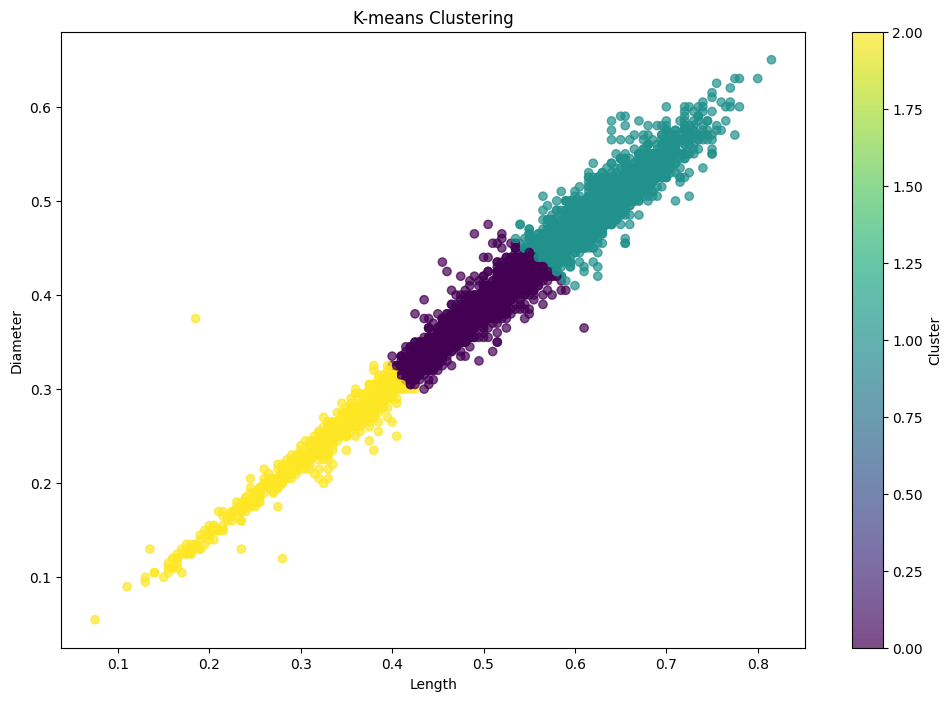

In [ ]:
kmeans = KMeans(n_clusters=n_classes, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
print(kmeans_labels)
plt.figure(figsize=(12, 8))
plt.scatter(X['Length'], X['Diameter'], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()


[2 1 2 ... 0 0 0]


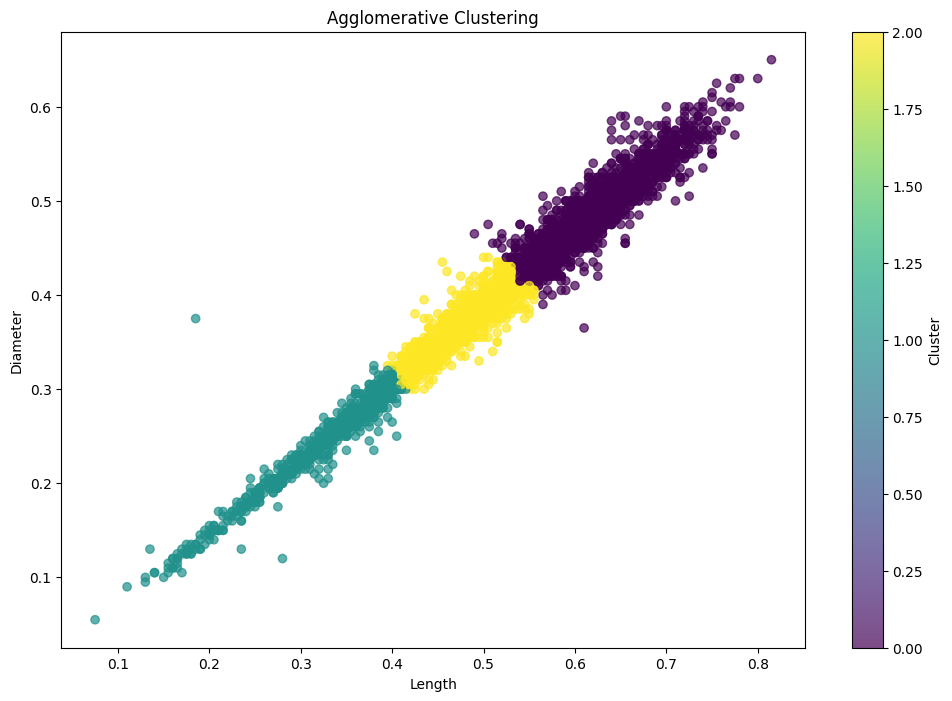

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=n_classes)
agg_labels = agg_clustering.fit_predict(X_scaled)
print(agg_labels)
plt.figure(figsize=(12, 8))
plt.scatter(X['Length'], X['Diameter'], c=agg_labels, cmap='viridis', alpha=0.7)
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('Agglomerative Clustering')
plt.colorbar(label='Cluster')
plt.show()


[0 0 0 ... 0 0 0]


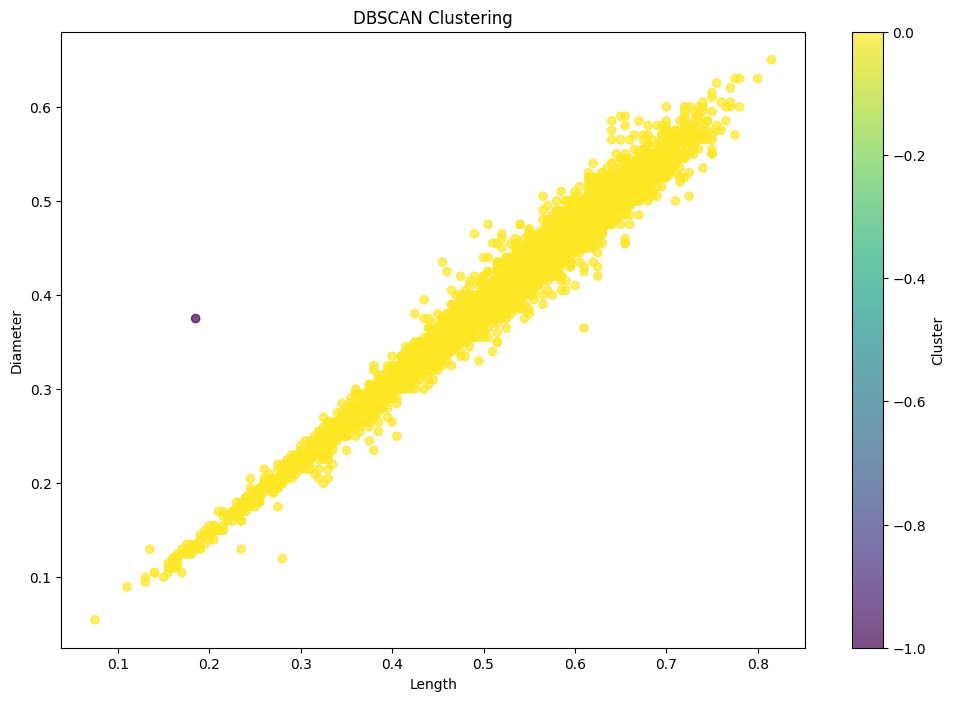

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
print(dbscan_labels)
plt.figure(figsize=(12, 8))
plt.scatter(X['Length'], X['Diameter'], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
gmm = GaussianMixture(n_components=n_classes, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
print(gmm_labels)
plt.figure(figsize=(12, 8))
plt.scatter(X['Length'], X['Diameter'], c=gmm_labels, cmap='viridis', alpha=0.7)
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('Gaussian Mixture Model')
plt.colorbar(label='Cluster')
plt.show()


###6. Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию contingency_matrix() из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании, на основании данных в матрице сопряженности, не используя другие функции из scikit-learn или других фреймворков.


In [ ]:
from sklearn.metrics.cluster import contingency_matrix
import math
# Выбираем признаки
y_true = features['Sex'].cat.codes  # Истинные метки классов в числовом формате
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Функция для расчета условной энтропии
def conditional_entropy(cont_matrix):
    total = np.sum(cont_matrix)
    entropy = 0.0
    for j in range(cont_matrix.shape[1]):
        column_sum = np.sum(cont_matrix[:, j])
        if column_sum > 0:
            for i in range(cont_matrix.shape[0]):
                if cont_matrix[i, j] > 0:
                    p_ij = cont_matrix[i, j] / total
                    p_j = column_sum / total
                    entropy -= p_ij * math.log(p_ij / p_j)
    return entropy

In [ ]:
# Функция для расчета TP, FN, FP, TN
def calculate_matrix(cont_matrix):
    n = np.sum(cont_matrix)
    tp = 0
    for i in range(cont_matrix.shape[0]):
        for j in range(cont_matrix.shape[1]):
            if cont_matrix[i, j] > 1:
                tp += math.comb(cont_matrix[i, j], 2)  # Количество пар внутри кластера

    # Число всех возможных пар
    total_pairs = math.comb(n, 2)

    row_sums = np.sum(cont_matrix, axis=1)
    col_sums = np.sum(cont_matrix, axis=0)

    # Считаем FP и FN
    fn = np.sum([math.comb(r, 2) for r in row_sums]) - tp
    fp = np.sum([math.comb(c, 2) for c in col_sums]) - tp

    # TN = все пары - TP - FN - FP
    tn = total_pairs - tp - fn - fp

    return tp, fn, fp, tn

In [ ]:
# Функция для расчета индекса Rand
def rand_index(tp, fn, fp, tn):
    return (tp + tn) / (tp + tn + fp + fn)

# Алгоритмы кластеризации
algorithms = {
    'K-means': KMeans(n_clusters=n_classes, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=n_classes),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Gaussian Mixture': GaussianMixture(n_components=n_classes, random_state=42)
}

In [ ]:
# Применение каждого алгоритма и расчет мер качества
for name, algorithm in algorithms.items():
    print(f"\n{name} Kластеризация")

    # Для GMM используем .fit_predict(), а для остальных алгоритмов те же методы
    if isinstance(algorithm, GaussianMixture):
        y_pred = algorithm.fit_predict(X_scaled)
    else:
        y_pred = algorithm.fit_predict(X_scaled)

    # Построение матрицы сопряженности
    cont_matrix = contingency_matrix(y_true, y_pred)
    print("Contingency Matrix:")
    print(cont_matrix)

    # Расчет условной энтропии
    entropy = conditional_entropy(cont_matrix)
    print(f"Conditional Entropy: {entropy:.4f}")

    # Расчет TP, FN, FP, TN
    tp, fn, fp, tn = calculate_matrix(cont_matrix)
    print(f"TP: {tp}, FN: {fn}, FP: {fp}, TN: {tn}")

    # Расчет индекса Rand
    ri = rand_index(tp, fn, fp, tn)
    print(f"Rand Index: {ri:.4f}")

###7. Oпределите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.


In [ ]:
# Dictionary to store entropy values for each algorithm
entropy_values = {}

# Применение каждого алгоритма и расчет мер качества
for name, algorithm in algorithms.items():
    # Применение алгоритма
    if isinstance(algorithm, GaussianMixture):
        y_pred = algorithm.fit_predict(X_scaled)
    else:
        y_pred = algorithm.fit_predict(X_scaled)

    # Построение матрицы сопряженности
    cont_matrix = contingency_matrix(y_true, y_pred)

    # Расчет условной энтропии
    entropy = conditional_entropy(cont_matrix)

    # Сохраняем значение энтропии для текущего алгоритма
    entropy_values[name] = entropy

# Определение алгоритма с наименьшей условной энтропией
best_algorithm = min(entropy_values, key=entropy_values.get)
best_entropy = entropy_values[best_algorithm]

print(f"\nЛучший алгоритм кластеризации по условной энтропии: {best_algorithm}")
print(f"Минимальная условная энтропия: {best_entropy:.4f}")


###8. Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

In [ ]:
from matplotlib.colors import ListedColormap
# Инициализируем и обучаем KMeans
kmeans = KMeans(n_clusters=n_classes, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

# Определяем сетку для областей принятия решений
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Прогнозируем кластер для каждой точки на сетке
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Создаем цветовые карты
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00'])

# Визуализируем области принятия решений
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# Визуализируем точки данных
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap=cmap_bold, edgecolor='k')

# Добавляем подписи осей и заголовок
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('Области принятия решений и точки данных для кластеризации KMeans')

# Добавляем легенду
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
plt.legend(handles, [f'Кластер {i}' for i in range(n_classes)], title="Кластеры")

# Показываем график
plt.show()
